# Credit Card Defaults - Classification & Regression

***
### MSDS 7331 Fall 2019 Lab 2

The assignment  is for buidling the classfication and regression models based on Lab one dataset. 

**Team Members**

•	Pankaj Kumar

•	Ryan Goodwin

•	Deepti Kunupudi

**Data Source Reference**

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

**Data Description**

"Default of credit card clients Data Set" is from the UCI Machine Learning Repository. This data set contains records of 30,000 Taiwanese credit card clients between April 2005 and September 2005. 24 explanatory variables are given with these records describing factors such as monthly limit, sex, relationship status and amount owed.

The purpose of this data is to use these explanatory variables to determine if the client would default on their payment for the following month, which is the response variable we will be looking at with this dataset.

**Github Repository**

https://github.com/pankajti/MSDS_7331_Lab2/blob/master/submission/Lab2/Team_Pankaj_Ryan_Deepti_Lab%20II%20Classification.ipynb


**NBviewer Link**
https://nbviewer.jupyter.org/github/pankajti/MSDS_7331_Lab2/blob/master/submission/Lab2/Team_Pankaj_Ryan_Deepti_Lab%20II%20Classification.ipynb


<div class="alert alert-block alert-info">
<b>Note:</b> The following sections below follows the Rubric as per class standards. 
</div>

***
# Data Preparation Part 1	
*Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.*

<div class="alert alert-block alert-warning">
<b>Note:</b> The below sections are subsections within Data Preparation Part 1 to visualize the segments more clearly.
</div>

#### <font color='#00008B'>Models</font>

We will be exploring the following modeling methods as part of classification to predict whether the customer will be default based on the dataset.

1. Random Forest model
       
2. Decision Tree

3. KNN

For regression, we will explore the following models to predict what is the amount a customer tends to pay for the current month given its history for previous payments.

1. Random Forest model
       
2. Decision Tree

3. KNN

We will define the X_train and Y_train from the original data set to test for X_test from the modified dataset. For classification, based on accuracy, precision, recall and F1Score the model is evaluated and confusion matrix is provided with the results of different models and their interpretation. For regression, we will look at R-Squared, RMSE and MSE to evaluate the model and represent the interpretation.

#### <font color='#00008B'>Data Preparation, Feature Engineering and Standardization</font>

To ensure better model efficiency and performance, following will be ensured -
1. Removal of multi-collinearity
2. Features are scaled and standardized
3. Response variable class imbalance

#### <font color='#2F4F4F'>Data Preparation</font>

Importing the required libraries for performing logistic regression and svm. Along with we will evaluate and make additional modifications based on the need. The initial steps for data preparation are:

* Reading the dataset
* Renaming the columns default.payment.next.month to DEFAULT and PAY_0 to PAY_1.
* Verifying the datatypes of the attributes in the dataset.
* Adding additinal/calculated attributes for doing further evaluation.

For data exploration and modelling, we will require the following libraries. As an initial step, we will import the required packages/libraries.

In [1]:
# Import libraries required for creating models and validating them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
import statsmodels.api as sm
from time import time
warnings.filterwarnings('ignore')
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import AlphaSelection
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#Read the data
ccdefault=pd.read_csv('./UCI_Credit_Card.csv')

In [3]:
ccdefault.rename(columns={'default.payment.next.month':'DEFAULT'},inplace=True)
ccdefault.rename(columns={'PAY_0':'PAY_1'},inplace=True)

Average Bill Amount as a temporary column to calcute the amount spent based on limit balance, which is further calculated for spend trends. The next calculation would be BILL_TO_LIMIT which provides the spend pattern.

In [4]:
#Average Bill Amount as a temporary column to calcute the amount spent based on limit balance.
ccdefault['BILLAMT_AVG']=((ccdefault['BILL_AMT1']+ccdefault['BILL_AMT2']+ccdefault['BILL_AMT3']+ ccdefault['BILL_AMT4']+ccdefault['BILL_AMT5']+ccdefault['BILL_AMT6'])/float(6)+5)


In [5]:
ccdefault['BILL_TO_LIMIT']=round((ccdefault['BILLAMT_AVG']/ccdefault['LIMIT_BAL']),2)

In [6]:
#drop the column (temporary column)
del ccdefault['BILLAMT_AVG']

In [7]:
#Verifying the datatypes in the dataset
ccdefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
ID               30000 non-null int64
LIMIT_BAL        30000 non-null float64
SEX              30000 non-null int64
EDUCATION        30000 non-null int64
MARRIAGE         30000 non-null int64
AGE              30000 non-null int64
PAY_1            30000 non-null int64
PAY_2            30000 non-null int64
PAY_3            30000 non-null int64
PAY_4            30000 non-null int64
PAY_5            30000 non-null int64
PAY_6            30000 non-null int64
BILL_AMT1        30000 non-null float64
BILL_AMT2        30000 non-null float64
BILL_AMT3        30000 non-null float64
BILL_AMT4        30000 non-null float64
BILL_AMT5        30000 non-null float64
BILL_AMT6        30000 non-null float64
PAY_AMT1         30000 non-null float64
PAY_AMT2         30000 non-null float64
PAY_AMT3         30000 non-null float64
PAY_AMT4         30000 non-null float64
PAY_AMT5         30000 non-null f

In [8]:
ccdefault.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,BILL_TO_LIMIT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.373016
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.352023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-0.230000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.030000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.280000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.690000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,5.360000


**Feature Engineering**

Firstly, identifying the multicollinearity is very important step to ensure that none of the predictors are highly correlated with eachother. We can check using correlation between the predictors using pearson's correlation function or we can verify using VIF (Variance Inflation Factors).  VIF assesses whether factors are correlated to each other (multicollinearity), which could affect p-values and the model isn't going to be as reliable. A rule of thumb in interpreting the variance inflation factor:
For values below 10, moderately correlated but greater than 10, they are highly correlated which needs to be looked at further.

We will verify the features before and after scaling function. 

In [9]:
mcc = ccdefault.copy()
# Y Response variable dataframe
mcc_Y = mcc['DEFAULT']

# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['DEFAULT'],axis=1)
# Create Explanatory Variables DF to support the individual models
mcc_X = mcredit
mcc_X_Rfe = mcredit
mcc_X_knn = mcredit
mcc_X_dt = mcredit
mcc_X_rf = mcredit

We are using standardscalar function to standardize the dataset. It will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [10]:
from sklearn.preprocessing import StandardScaler

#Scale data
scaler = StandardScaler()
mcc_X_scaled = scaler.fit_transform(mcc_X)
mcc_X_Rfe_scaled = scaler.fit_transform(mcc_X_Rfe)
mcc_X_knn_scaled = scaler.fit_transform(mcc_X_knn)
mcc_X_dt_scaled = scaler.fit_transform(mcc_X_dt)
mcc_X_rf_scaled = scaler.fit_transform(mcc_X_rf)

#Save as data frames
df_mcc_X_scaled = pd.DataFrame(mcc_X_scaled)
df_mcc_X_Rfe_scaled = pd.DataFrame(mcc_X_Rfe_scaled)
df_mcc_X_knn_scaled= pd.DataFrame(mcc_X_knn_scaled)
df_mcc_X_dt_scaled= pd.DataFrame(mcc_X_dt_scaled)
df_mcc_X_rf_scaled= pd.DataFrame(mcc_X_rf_scaled)

We will verify the VIF factor for the dataset before scaling and after scaling. The below code calculates the VIF for before scaling. We will verify VIF values if it is below 10 it is moderately correlated and greater than 10, they are highly correlated.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
df2_vif = pd.DataFrame()
df2_vif["VIF Factor"] = [vif(mcc_X.values, i) for i in range(mcc_X.shape[1])]
df2_vif["features"] = mcc_X.columns
print("VIF Factors Before Scaling")
print("--------------------------")
df2_vif

VIF Factors Before Scaling
--------------------------


,VIF Factor,features
0,3.919295,ID
1,5.709979,LIMIT_BAL
2,9.327123,SEX
3,6.896695,EDUCATION
4,6.890286,MARRIAGE
5,11.861247,AGE
6,1.920915,PAY_1
7,3.233972,PAY_2
8,3.730617,PAY_3
9,4.447594,PAY_4


VIF before scaling We see that BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 and BILL_AMT6 are highly correlated with each other and may be including them in the model may not yield correct results. It also indicates that standard errors and there by the variances of the estimated coefficents are inflated.

AGE is another variable which needs to be looked at. Probably, it is correlated with another variable within the dataset.

Lets further check the pearson's correlation values for these features.

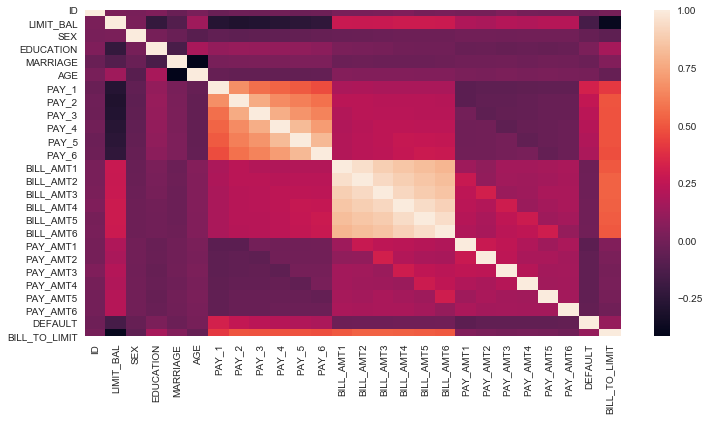

In [12]:
#Set max row display
pd.set_option('display.max_row',100)
#Set max column width to 50
pd.set_option('display.max_columns',50)
correlations = mcc.corr()
plt.figure(figsize=(12,6))
ax = sns.heatmap(correlations, xticklabels = correlations.columns.values, yticklabels = correlations.columns.values)

We see that the BILL_AMT[1:6] are highly correlated with each other. Lets verify the same using scaled dataset.

**VIF Factors after scaling**

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df2_vif = pd.DataFrame()
df2_vif["VIF Factor"] = [vif(df_mcc_X_scaled.values, i) for i in range(df_mcc_X_scaled.shape[1])]
df2_vif["features"] = mcc_X.columns
print("VIF Factors After Scaling")
print("--------------------------")
df2_vif

VIF Factors After Scaling
--------------------------


,VIF Factor,features
0,1.014956,ID
1,2.316279,LIMIT_BAL
2,1.026127,SEX
3,1.130460,EDUCATION
4,1.231043,MARRIAGE
5,1.275234,AGE
6,1.922180,PAY_1
7,3.194103,PAY_2
8,3.660443,PAY_3
9,4.295639,PAY_4


We see similar results and BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 & BILL_AMT6 are highly correlated with each other and may be including them in the model may not yield correct results.

We see that AGE looks ok after scaling / standardizaton. All other values look ok.

Feature engineering to find the most important features will help with predicting the outcome with right selection to develop the model. We can verify using the p-values and identify the features. The below results show similar results like above for BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5 & BILL_AMT6 features.Along with these, we can see ID also are not important features.

***

The following are the predictors and response columns in the dataset.

**Predictors:**

* SEX
* AGE
* EDUCATION
* MARRIAGE
* PAY_1
* PAY_2
* PAY_3
* PAY_4
* PAY_5
* PAY_6
* PAY_AMT1
* PAY_AMT2
* PAY_AMT3
* PAY_AMT4
* PAY_AMT5
* PAY_AMT6
* BILL_TO_LIMIT

**Response**

* DEFAULT

DEFAULT has values 0 and 1, indicating whether customer has paid the agreed amount based or not. 0 - nondefault and 1-default. It is a binary classification. Lets verify how the data classification for classification prediction.

From the below value counts on the response variable, the distribution is uneven. 

The values 0 indicates not default and 1 indicates default value. 

We clearly see that only 22% of the data is default. In the next few sections, we will evaluate more on how to resolve this for better predictions.

Class 0: 23364
Class 1: 6636
Proportion: 3.52 : 1


<Figure size 576x360 with 0 Axes>

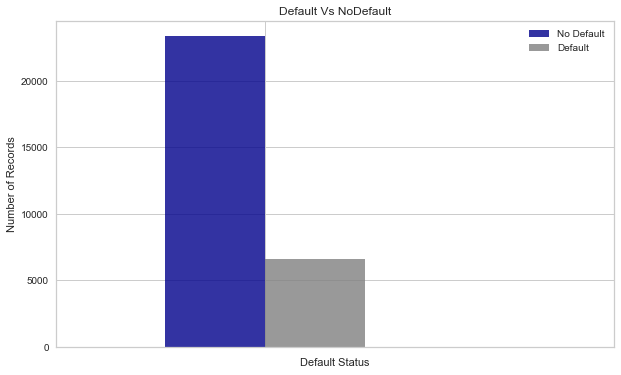

In [14]:
# Explore response variable distribution
plt.figure(figsize=(8,5))
target_count = ccdefault.DEFAULT.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

# Draw bar plot

# data to plot
n_groups = 1
NoDefault=ccdefault.DEFAULT.value_counts()[0]
Default=ccdefault.DEFAULT.value_counts()[1]
 
# create plot
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
plt.figure(figsize=(10,6))
plt.bar(index, NoDefault, bar_width,
                 alpha=opacity,
                 color='darkblue',
                 label='No Default')
 
plt.bar(index + bar_width, Default, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Default')
 
plt.xlabel('Default Status')
plt.ylabel('Number of Records')
plt.title('Default Vs NoDefault')
plt.xlim(-0.8, 2)
plt.xticks(index + bar_width/2, (''))
plt.legend()
 
plt.show()

***
# Data Preparation Part 2
*Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).*

The initial dataset has following fields but the BILL_AMT[1:6] are highly correlated which are eliminated as part of feature engineering. ID column is highly cardinal column which will be eliminated from the dataset.

New additional columns are added to the original dataset to see the spend trends as per the limit balance. We are calculating the column BILL_TO_LIMIT

The below describe function, gives the spread of data include the data distribution and uniqueness. It gives the quantile metrics for each attribute in the data.

In [126]:
ccdefault.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,BILL_TO_LIMIT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.373016
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.352023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,-0.230000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,0.030000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.280000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,0.690000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,5.360000


For Classification, ID, BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5 & BILL_AMT6 are eliminated. All other columns are included in the dataset. In case of classification, we are predicting whether the user will default on payment.

For Regression, the same columns/attributes are eliminated. All other columns are included in the dataset. In case of regression, we are predicting what is the amount a customer tends to pay for the current month given its history for previous payments.

In both types, BILL_TO_LIMIT will be helpful in predicting. All the columns will be added to both the datasets.

***
# Modeling and Evaluation 1
*Choose and explain your evaluation metrics that you will use (i.e., accuracy,
precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.*

### Classification


In classfication, we have different evaluation metrics which can be leveraged based on the given dataset. Here are the acronyms for calculating the measures.

TP: True Positives
TN: True Negatives
FP: False Positives
FN: False Negatives

**Accuracy**

Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. It is great measure only when you have symmetric datasets where values of false positive and false negatives are almost same.

Accuracy = TP+TN/TP+FP+FN+TN

**Precision**

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate.

Precision = TP/TP+FP

**Recall**

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall = TP/TP+FN

**F1 Score**

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is usually more useful than accuracy, especially if you have an uneven class distribution.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

For our evaluation with the current dataset, we see that the response variable distribution is uneven/imbalance, accuracy may not be the right measure due to class imbalance. The proportion of defaulted borrowers is very low when compared to non-default and therfore the recall or f1 score will be the metric to measure the performance of the classification task.

Apart from the above measures, we will look at AUC (Area under curve) and ROC (Receiver operating characteristic). The higher the AUC, the greater area under the (ROC) curve thus better prediction.



In [128]:
Image(url ='./images/ClassImbalance.png')

### Regression

When it comes to regression, we have MSE,RMSE and R^2 (R-squared) which are leveaged to identify the better model. Lower the MSE/RMSE and higher R^2 gives better model. Lets explore more in detail on why these metrics are better.

**MSE** basically measures average squared error of our predictions. For each point, it calculates square difference between the predictions and the target and then average those values. The higher this value, the worse the model is. It is never negative, since we’re squaring the individual prediction-wise errors before summing them, but would be zero for a perfect model.

**RMSE**(Root Mean Squared Error) is just the square root of MSE. The square root is introduced to make scale of the errors to be the same as the scale of targets.

The **MAE**(Mean Average Error) is a linear score which means that all the individual differences are weighted equally in the average. It is less sensitive to outliers.

**R2 or R^2** is another metric we may use to evaluate a model and it is closely related to MSE. It is normally called coefficient of determination. It ranges from infinity to 1. if it is negative, the model is worse performing. It is general to use Adjusted-R2 than R2 while selecting the best regression models.

Based on the dataset, we will leverage RMSE & R^2 to determine the best fit. We know from the datset that the data is skewed for PAY_AMT1(Refer below picture).

Text(0, 0.5, 'Frequency')

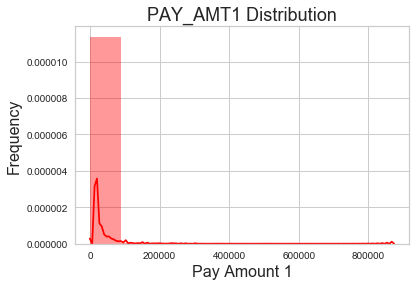

In [127]:
sns.distplot(ccdefault['PAY_AMT1'], kde=True, color='red', bins=10)
plt.title('PAY_AMT1 Distribution', fontsize=18)
plt.xlabel('Pay Amount 1', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

***
# Modeling and Evaluation 2
*Choose the method you will use for dividing your data into training and
testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why
your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.*

As discussed in the previous sections, we evaluated that the response variable does not have equal distribution / class balance for predicting. The next steps would be evaluating further to ensure we have right training dataset and equal class balance.

**Initial Analysis**

From the below value counts on the response variable, the distribution is uneven. 

The values 0 indicates not default and 1 indicates default value. 

We clearly see that only 22% of the data is default. We do not want the algorithm to be biased due to this imbalance and be trained more on the not default values.  

Class 0: 23364
Class 1: 6636
Proportion: 3.52 : 1


<Figure size 576x360 with 0 Axes>

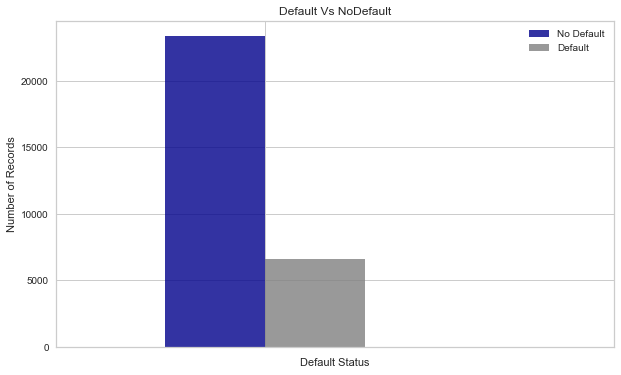

In [15]:
# Explore response variable distribution
plt.figure(figsize=(8,5))
target_count = ccdefault.DEFAULT.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

# Draw bar plot

# data to plot
n_groups = 1
NoDefault=ccdefault.DEFAULT.value_counts()[0]
Default=ccdefault.DEFAULT.value_counts()[1]
 
# create plot
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
plt.figure(figsize=(10,6))
plt.bar(index, NoDefault, bar_width,
                 alpha=opacity,
                 color='darkblue',
                 label='No Default')
 
plt.bar(index + bar_width, Default, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Default')
 
plt.xlabel('Default Status')
plt.ylabel('Number of Records')
plt.title('Default Vs NoDefault')
plt.xlim(-0.8, 2)
plt.xticks(index + bar_width/2, (''))
plt.legend()
 
plt.show()

Based on the above analysis, we have almost have 78% of the data as not default. 

Due to imbalance class, training the model will be tricky. The model may predict majority of the class as non default and ignore the minority. 

There are different ways to work on this apparent class imbalance. 
* Instead of accuracy, we will look into the other metrics like **Confusion Matrix, Precision, Recall and F1 Score** for better insights. 


* Apart from these, we will use resampling techniques like Stratified K-folds. Stratification will ensure that the percentages of each class in your entire data will be the same (or very close to) within each individual fold.

**K-fold stratification**

In our case, we will use 5-fold stratification. We will split the dataset for each type of model. 

*Classification*

We will leverage Default as the response variable for classification.

In [16]:
cc = ccdefault.copy() # taking a copy in memory
from sklearn.model_selection import StratifiedShuffleSplit
if 'DEFAULT' in cc:
    y = cc['DEFAULT'].values
    del cc['DEFAULT']
    del cc['BILL_AMT1']
    del cc['BILL_AMT2']
    del cc['BILL_AMT3']
    del cc['BILL_AMT4']
    del cc['BILL_AMT5']
    del cc['BILL_AMT6']
    X = cc.values
num_cv_iterations = 5
num_instances = len(y)
cv_object = StratifiedShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object.get_n_splits(X, y)
print(cv_object)
for train_index, test_index in cv_object.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8)
TRAIN: [28976 29616 20315 ...  6063 16283 15621] TEST: [ 6669  6830 16516 ... 16163  1990  7999]
TRAIN: [11237  9898 17028 ...  1265   611  7250] TEST: [ 4174 19421 15502 ... 19995  6124 25090]
TRAIN: [23721 14143  5492 ...  4346  5119 23351] TEST: [21778  4074 19546 ...   941 14061 13584]
TRAIN: [19706  2009 13912 ...  3924 20112 21366] TEST: [ 7136 15572 21097 ... 24126  8440  7078]
TRAIN: [ 5794  1831 15948 ... 18673 15962 17274] TEST: [17565 28798 29978 ... 10151 11434 21212]


Using random_state in the split ensures that splits are reproducible. It simply sets a seed to the random generator, so that train-test splits are always deterministic.
Lets verify the proportion of the defaults in each dataset.

In [17]:
print('----------------------------------------- ' )
print('Number of observations in train dataset  : ' + str(len(y_train)))
print('Number of observations in test dataset   : ' + str(len(y_test)))

train_defaults = sum(y_train == 1)
test_defaults = sum(y_test == 1)
print('----------------------------------------- ' )
print('Number of defaults in train dataset      : ' + str(train_defaults))
print('Number of defaults in test dataset       : ' + str(test_defaults))

proportion_train_defaults = train_defaults / len(y_train)
print('----------------------------------------- ' )
print('Proportion of defaults in train dataset  : ' + str(proportion_train_defaults))



proportion_test_defaults = test_defaults / len(y_test)

print('Proportion of defaults in test set       : ' + str(proportion_test_defaults))
print('----------------------------------------- ' )


----------------------------------------- 
Number of observations in train dataset  : 24000
Number of observations in test dataset   : 6000
----------------------------------------- 
Number of defaults in train dataset      : 5309
Number of defaults in test dataset       : 1327
----------------------------------------- 
Proportion of defaults in train dataset  : 0.22120833333333334
Proportion of defaults in test set       : 0.22116666666666668
----------------------------------------- 


Finally, Based on the proportions the datasets have around 22% of default data, which ensures we have balanced on the response variable. This dataset would be used in the next models.

*Regression*

We will leverage PAY_AMT1 as response variable for regression models. PAY_AMT1 is slightly skewed and we will be using the same method. Probably while modeling, we need to look into transformation (log) to ensure the data is close to normal distribution.

Text(0, 0.5, 'Frequency')

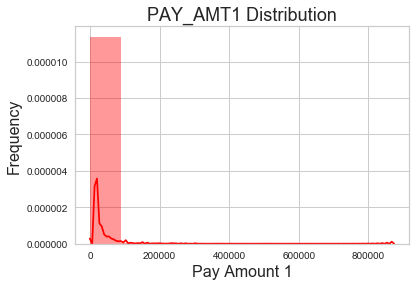

In [18]:
sns.distplot(ccdefault['PAY_AMT1'], kde=True, color='red', bins=10)
plt.title('PAY_AMT1 Distribution', fontsize=18)
plt.xlabel('Pay Amount 1', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

In [19]:
mcc = ccdefault.copy()
# Y Response variable dataframe
y_reg = mcc['PAY_AMT1'].values
# Features with no predictive features with respect to resposne variable
mcredit = mcc.drop(['PAY_AMT1'],axis=1)
mcc_X = mcredit
del mcc_X['DEFAULT']
del mcc_X['ID']


X_reg = mcc_X.values
num_instances = len(y_reg)
cv_object_reg = ShuffleSplit(n_splits = num_cv_iterations,
test_size = 0.20, train_size = 0.80, random_state=11)
cv_object_reg.get_n_splits(X_reg, y_reg)
print(cv_object_reg)
for train_index, test_index in cv_object_reg.split(X_reg, y_reg):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
    y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]

ShuffleSplit(n_splits=5, random_state=11, test_size=0.2, train_size=0.8)
TRAIN: [10574  1826 26458 ... 21584  3775 10137] TEST: [16131 22502  9281 ...  2302 20117  5325]
TRAIN: [14312  5621  9756 ... 14795  1761 10411] TEST: [23990 12026 18018 ... 18504  3826 22997]
TRAIN: [24613 18862  7514 ...  9825 21800  7223] TEST: [25751  1408  2329 ... 13731  9430 17834]
TRAIN: [ 5199 22129  7059 ... 26445 16174 28119] TEST: [ 1736 20903   973 ... 24406 27021 16104]
TRAIN: [11485 26551  2766 ...  9370 20203 25639] TEST: [18873  8061  1602 ... 17926 20760   999]


In both cases, the data is split into 80:20 for training and test datasets using 5-fold stratification.

In [87]:
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)


***
# Modeling and Evaluation 3
*Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!*

We will be exploring the following modeling methods as part of classification to predict whether the customer will be default based on the dataset.

1. Random Forest model
       
2. Decision Tree

3. KNN

For regression, we will explore the following models to predict what is the amount a customer tends to pay for the current month given its history for previous payments.

1. Random Forest model
       
2. Decision Tree

3. KNN

We will define the X_train and Y_train from the original data set to test for X_test from the modified dataset. For classification, based on accuracy, precision, recall and F1Score the model is evaluated and confusion matrix is provided with the results of different models and their interpretation. For regression, we will look at R-Squared, RMSE and MAE to evaluate the model and represent the interpretation.

***
### Classification Models

#### 1. Random Forest

Random forest is an ensempble technique that uses set of decision trees to handle classification problem. It uses random vectors to choose features based on which it creates decision trees. These features are choosen basedon some fixed distribution. Classification is done with each of these decision trees and then a majority vote is taken to decide final class. Following images gives an overview of Random forest. 



In [20]:
Image(url ='./images/random_forest_tan.png')

Random forest classifiers use multiple estimators and each each estimator runs of different set of features based on random selection of features and attributes. We created below models by choosing different number of estimators and different values for max depths for decision trees. Class weights are also choosen either None or balanced. Since the dataset contains unbalanced classes. Only 22 % of them are defaults So we have used class weight balanced in some of the models. One model is created for all these combinations and the one with maximum recall is selected for final evaluation 

**Advantages**

* It is one of the most accurate algorithms. 

* It can work of very large number of datasets. 

* It works on the concept of bagging Unlike the Adaboost which works on the concept of boosting where parameters with less likelyhood of selection are boosted to have more chances of getting selected. 

**Disadvantages**

* It might overfit the model due to the presense of noisy data.

* This leads to poor performance on unseen data.

The time it takes to fit and predict for iteration 0  is 0.797062873840332, recall is 0.13187641296156744 for depth [1, 5, 9, 10] 
classification report for iteration 0 with improved recall 0.13187641296156744 max_depth 1 class weight at None


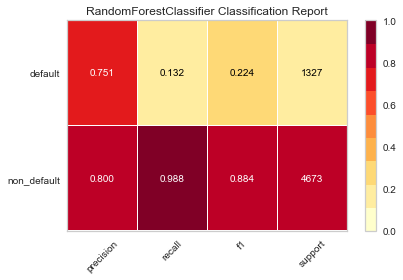

The time it takes to fit and predict for iteration 1  is 0.5727922916412354, recall is 0.1281085154483798 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 2  is 0.7880158424377441, recall is 0.11981914091936699 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 3  is 0.7500908374786377, recall is 0.13187641296156744 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 4  is 0.8365614414215088, recall is 0.1281085154483798 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 5  is 13.662813663482666, recall is 0.5779954785229842 for depth [1, 5, 9, 10] 
classification report for iteration 5 with improved recall 0.5779954785229842 max_depth 5 class weight at balanced


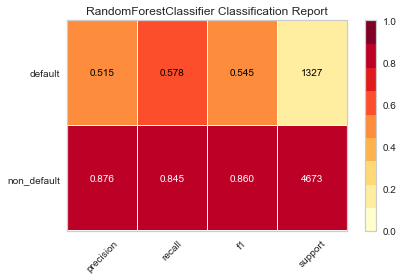

The time it takes to fit and predict for iteration 6  is 10.532682418823242, recall is 0.5802562170308968 for depth [1, 5, 9, 10] 
classification report for iteration 6 with improved recall 0.5802562170308968 max_depth 5 class weight at balanced


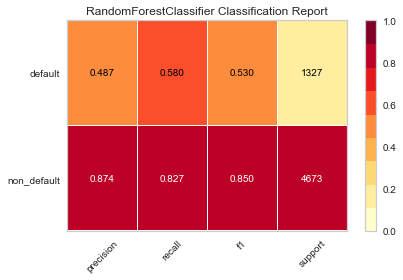

The time it takes to fit and predict for iteration 7  is 9.860349178314209, recall is 0.5719668425018839 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 8  is 10.024998903274536, recall is 0.5719668425018839 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 9  is 11.37636685371399, recall is 0.584777694046722 for depth [1, 5, 9, 10] 
classification report for iteration 9 with improved recall 0.584777694046722 max_depth 5 class weight at balanced


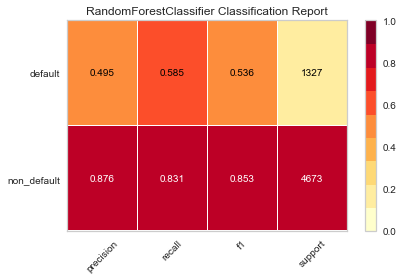

The time it takes to fit and predict for iteration 10  is 45.348217725753784, recall is 0.359457422758101 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 11  is 40.36068344116211, recall is 0.3632253202712886 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 12  is 50.45695734024048, recall is 0.34287867370007535 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 13  is 40.42153477668762, recall is 0.36925395629238883 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 14  is 34.84531021118164, recall is 0.3707611152976639 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 15  is 3.5189931392669678, recall is 0.5787490580256217 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 16  is 3.031595468521118, recall is 0.5599095704596835 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 17  is 5.456058740615845, rec

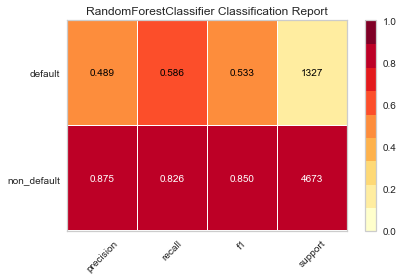

The time it takes to fit and predict for iteration 29  is 29.236405849456787, recall is 0.587792012057272 for depth [1, 5, 9, 10] 
classification report for iteration 29 with improved recall 0.587792012057272 max_depth 5 class weight at balanced


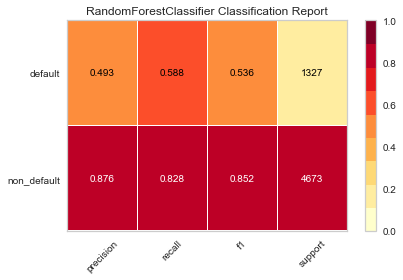

The time it takes to fit and predict for iteration 30  is 5.095486640930176, recall is 0.36096458176337604 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 31  is 3.261054754257202, recall is 0.36397889977392617 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 32  is 4.261447191238403, recall is 0.34287867370007535 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 33  is 3.711306095123291, recall is 0.37226827430293896 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 34  is 4.866676330566406, recall is 0.3654860587792012 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 35  is 18.312074899673462, recall is 0.5795026375282593 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 36  is 11.982170343399048, recall is 0.560663149962321 for depth [1, 5, 9, 10] 
The time it takes to fit and predict for iteration 37  is 11.834022760391235, 

In [23]:
## Random Forest classifiers models with different parameters 

iter_num=0
times_rec=[]
 
rf_max_acc = 0
rf_max_recal = 0
rf_trn_idx_max_acc = []
rf_tst_idx_max_acc  = []
rf_estimator_for_max = 0
rf_max_depth_max = 0
rf_class_weight_max = None

#for loop 
estimators = [100,   500, 1000]
max_depths = [1,5,9,10]
class_weights = [None , 'balanced']
for estimator , max_depth , class_weight in zip(estimators*len(max_depths)*len(class_weights) ,
             max_depths*len(class_weights)*len(estimators),
             class_weights*len(max_depths)*len(estimators)):
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices] 
        X_test = X[test_indices]
        y_test = y[test_indices]

         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestClassifier(n_estimators=estimator, max_depth=max_depth, class_weight= class_weight,
                                               random_state=0,max_features='auto')

        random_forest.fit(X_train,y_train)  # train object
        y_hat = random_forest.predict(X_test) # get test set precitions

        t1=time()
        diff=np.array([t1-t0])

        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = mt.recall_score(y_test, y_hat)
        print ("The time it takes to fit and predict for iteration {}  is {}, recall is {} for depth {} ".format(iter_num, diff[0],
                                                                                                   rcl,max_depths)) 

        #if acc > rf_max_acc :
        if rcl > rf_max_recal:
            #rf_max_acc = acc
            rf_max_recal = rcl
            rf_trn_idx_max_acc = train_indices
            rf_tst_idx_max_acc  = test_indices
            rf_estimator_for_max = estimator
            rf_max_depth_max = max_depth
            rf_class_weight_max = class_weight
            
            print ("classification report for iteration {} with improved recall {} max_depth {} class weight at {}".format(iter_num, rcl,rf_max_depth_max,rf_class_weight_max))
            rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)
            rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            rf_cl_reporter.show()   


        iter_num+=1    

By incrementally increasing the max_depths parameter we can see recall of the random forest model can be improved,  Around max_depths of 6, the precision value is decresed but the recall value is better and improved than max_depths equal to 5 or less. It indicates that as max_depths increases, the recall value was better.

Also, We see that class_weight = 'None' has less recall value when compare to balanced. 

By adjusting the values, we see an improvement in the recall value which increased from 0.13 to 0.60. Based on Scikit documentation, the **balanced** mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. The dataset leveraged is with equal response variable proportions and we see the results a bit more promosing with class weight = balanced.

In [26]:
clf = RandomForestClassifier(max_depth=6, min_samples_split=2, random_state=0, class_weight='balanced',
                             max_features='auto', n_estimators=500, bootstrap=True)
model_rf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test, y_hat)
conf = mt.confusion_matrix(y_test, y_hat)
print("Confusion matrix\n",conf)

print("\n *** CLASSIFICATION REPORT ****")
#### CLASSIFICATION REPORT
ClassReport = mt.classification_report(y_test, y_hat)
print(ClassReport)

Confusion matrix
 [[3855  818]
 [ 535  792]]

 *** CLASSIFICATION REPORT ****
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4673
           1       0.49      0.60      0.54      1327

    accuracy                           0.77      6000
   macro avg       0.69      0.71      0.70      6000
weighted avg       0.79      0.77      0.78      6000



After the modified run with the parameters we see that max_depths=6, balanced as class_weight, estimates as 500 has balanced precision and recall.

In [31]:
values = sorted(zip(cc.columns, model_rf.feature_importances_), key=lambda x: x[1] * -1)
print(values)

[('PAY_1', 0.3397520580223742), ('PAY_2', 0.16467637646977593), ('PAY_3', 0.10048630077015715), ('PAY_4', 0.06354797589226403), ('PAY_5', 0.05214688443164557), ('PAY_AMT1', 0.041578895555392605), ('PAY_6', 0.03718067719397191), ('PAY_AMT2', 0.03491282438324612), ('BILL_TO_LIMIT', 0.03283886062469497), ('LIMIT_BAL', 0.031902270280883924), ('PAY_AMT3', 0.029762150832723325), ('PAY_AMT4', 0.022403341213088027), ('PAY_AMT6', 0.016958612004080467), ('PAY_AMT5', 0.012915027511238679), ('ID', 0.007859553529856482), ('AGE', 0.006092104948553138), ('EDUCATION', 0.00268245595192854), ('MARRIAGE', 0.001454481583854444), ('SEX', 0.0008491488002705775)]


The features which are important are described above inthe order of importance. We see that BILL_TO_LIMIT aloso a significant feature as how the user spends.

#### 2. Decision Tree

Decision Trees are used to classify model based on different split rules. like gini. We are creating multiple models and choosing one based on max recall score for our further analysis. Methods like decision trees, random forest, gradient boosting are being popularly used.

**Advantages**

* Easy to understand when represneted in the graphical interpretation. It is useful for data exploration.

* It traces all the paths from available features and data to arrive on a decision. 

* It does not scale or normalize the features like some of the other algorithms.

* Non-linear relationships between parameters do not affect tree performance.

* The number of hyper-parameters to be tuned is almost null.

**Disadvantages**

* It might take more times to train a model and might not be very accurate to the future data which it has need seen in training set.

* While working with continuous numerical variables, decision tree loses information, when it categorizes variables in different categories.

* It gives low prediction accuracy for a dataset as compared to other machine learning algorithms.

* Calculations can become complex when there are many class label.

* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data set prior to fitting with the decision tree.


In [39]:
Image(url ='./images/decision_tree_tan.png')

The time it takes to fit and predict for iteration 0  is 0.498995304107666 
classification report for iteration 0 class weight None


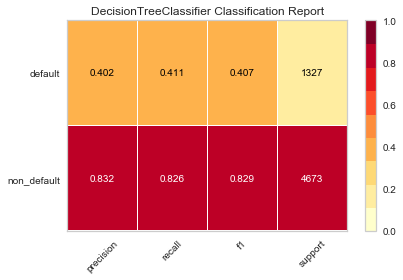

The time it takes to fit and predict for iteration 1  is 0.9632790088653564 
The time it takes to fit and predict for iteration 2  is 0.5940766334533691 
The time it takes to fit and predict for iteration 3  is 0.7199647426605225 
The time it takes to fit and predict for iteration 4  is 0.7993121147155762 
The time it takes to fit and predict for iteration 5  is 0.5140225887298584 
The time it takes to fit and predict for iteration 6  is 0.4968583583831787 
The time it takes to fit and predict for iteration 7  is 0.7077538967132568 
The time it takes to fit and predict for iteration 8  is 0.5411434173583984 
The time it takes to fit and predict for iteration 9  is 0.6336593627929688 


In [121]:
## Decision tree classifiers 

iter_num=0
times_rec=[]
decision_tree_classifiers = dict()
random_forest_classifiers = dict()

class_weights = [None , 'balanced']
dt_max_acc = 0
dt_max_recall = 0
dt_trn_idx_max_acc =[]
dt_tst_idx_max_acc = []
dt_class_weight_for_max = []

for class_weight in class_weights:
    for train_indices, test_indices in cv_object.split(X,y): 
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]

        t0 = time()
        decision_tree = DecisionTreeClassifier(class_weight = class_weight)
        decision_tree.fit(X_train,y_train)  # train object
        y_hat = decision_tree.predict(X_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])

        print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
        times_rec=np.append(times_rec,diff)


        # now let's get the accuracy , recall and confusion matrix for this iterations of training/testing
        acc = mt.accuracy_score(y_test,y_hat)
        rcl = mt.recall_score(y_test, y_hat)

        #if acc> dt_max_acc:
        if rcl> dt_max_recall:
            #dt_max_acc = acc
            dt_max_recall = rcl
            dt_trn_idx_max_acc = train_indices
            dt_tst_idx_max_acc = test_indices
            dt_class_weight_for_max = class_weight
            conf = mt.confusion_matrix(y_test,y_hat)
            print ("classification report for iteration {} class weight {}".format(iter_num,dt_class_weight_for_max))

            dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)
            dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
            dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
            dt_cl_reporter.show()  

       
        iter_num+=1
    

Lets check the gridsearch for better parameters for decision tree classifier.

**Decision Tree Classification Parameter evaluation with GridSearch**

In [129]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
import warnings
warnings.filterwarnings('ignore')

ClsEstimator = DecisionTreeClassifier()#(n_jobs = -1)

parameters = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2),'criterion':['gini','entropy']
             }
#Create a grid search object  
from sklearn.model_selection import GridSearchCV
ClsGridSearch = GridSearchCV(estimator=ClsEstimator
                   , n_jobs=10 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object # KFolds = 5
                   , scoring='recall')

#Perform hyperparameter search to find the best combination of parameters for our data
ClsGridSearch.fit(df_mcc_X_knn_scaled, mcc_Y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   10.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   14.1s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   29.1s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:   59.6s
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  4.4min
[Parallel(n_jobs=10)]: Done 2500 out of 2500 | elapsed:  4.6min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=10,
             param_grid={'criter

In [130]:
ClsGridSearchEst = ClsGridSearch.best_estimator_
print(ClsGridSearchEst)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Re-running the Decison tree model using the optimized parameter based on GridSearch evaluation.

In [132]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, precision_recall_fscore_support

X=mcredit.as_matrix().astype(np.float)
y=mcc_Y.as_matrix().astype(np.float)
yhat = np.zeros(y.shape) # initializing variable

for train, test in cv_object.split(X,y):
    # Use Results parameters from GridSearch to run KNN Classifier model
    clf_dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
    clf_dt.fit(X[train],y[train])
    yhat[test] = clf_dt.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = precision_score(y, yhat,average='weighted')
total_recall = recall_score(y, yhat,average='weighted')
classification_rpt = classification_report(y, yhat)
print ("Decision Tree accuracy with corresponding parameter settings")
print('Decision Tree classifier accuracy with optimal parameters is: %.3f'%(total_accuracy))
print('Decision Tree classifier accuracy with optimal parameters is: %.3f'%(total_precision))
print('Decision Tree classifier accuracy with optimal parameters is: %.3f'%(total_recall))
print('Decision Tree classifier classsification report with optimal parameters is: \n',(classification_rpt))

Decision Tree accuracy with corresponding parameter settings
Decision Tree classifier accuracy with optimal parameters is: 0.806
Decision Tree classifier accuracy with optimal parameters is: 0.784
Decision Tree classifier accuracy with optimal parameters is: 0.806
Decision Tree classifier classsification report with optimal parameters is: 
               precision    recall  f1-score   support

         0.0       0.82      0.96      0.89     23364
         1.0       0.66      0.25      0.36      6636

    accuracy                           0.81     30000
   macro avg       0.74      0.61      0.62     30000
weighted avg       0.78      0.81      0.77     30000



We see from above that the recall is lower at 0.25, indicating that the model is not able to identify the default class correctly. When compared to previous model, random forest decision tree may not be the right model. We will explore another model for comparision.

#### 3. KNN

KNN is used to classify models by using the K nearest number of points based on a chosen distance metric.The most common class of the K nearest points is used to classify the point that is being predicted. The distance metric can be a variety of options, we have chosen cosine, euclidean and manhattan distance as our metrics. We are creating multiple models and choosing one based on max recall score for our further analysis

**Advantages** 
* Simplicity. 

* Can be used and relying on a simple distance metric to determine the classification of the point. 

* Another advantage is the oppurtunity to fine tune multiple parameters to best fit the dataset. 

* A change in K can be implemented easily to judge metrics, and the distance metric can also be a variety of options.

**Disadvantages**
* Revolve around the distance metric. There is not set method to choosing a distance metric, so many options should be looked into. 

* lazy learner, which can lead to costly computing since the model needs to look at every point in the dataset and determine the closest neighbors.

For k =  10 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4673
           1       0.63      0.29      0.39      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



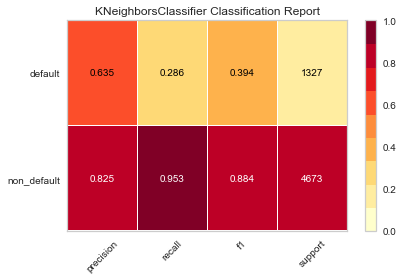

For k =  10 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4673
           1       0.64      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



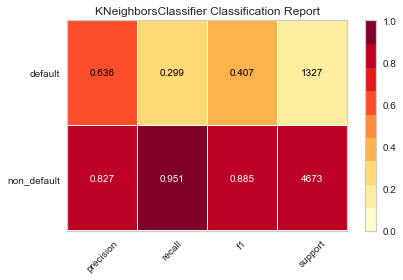

For k =  10 and metric =  euclidean :
For k =  10 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.67      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



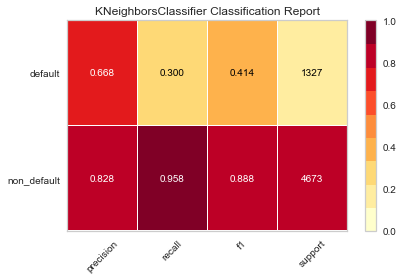

For k =  10 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.30      0.41      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



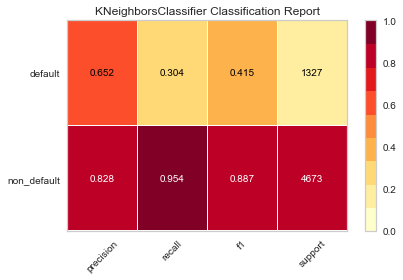

For k =  20 and metric =  euclidean :
For k =  20 and metric =  euclidean :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.65      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



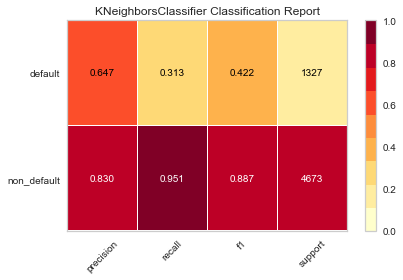

For k =  20 and metric =  euclidean :
For k =  20 and metric =  euclidean :
For k =  20 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  50 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  100 and metric =  euclidean :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
For k =  10 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.64      0.32      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.63      0.66      6000
weighted avg       0.79      0.81      0.78      6000


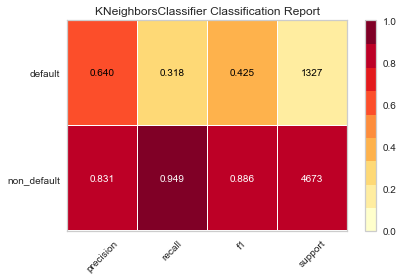

For k =  20 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.67      6000
weighted avg       0.80      0.81      0.79      6000



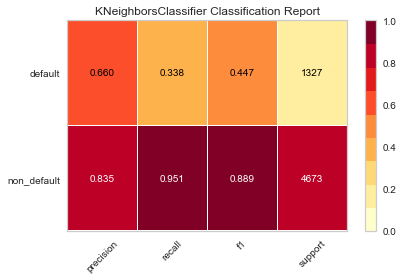

For k =  20 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.64      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000



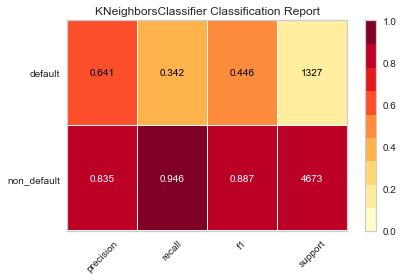

For k =  20 and metric =  cosine :
For k =  20 and metric =  cosine :
For k =  20 and metric =  cosine :
For k =  50 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



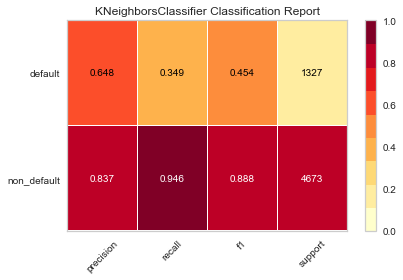

For k =  50 and metric =  cosine :
For k =  50 and metric =  cosine :
For k =  50 and metric =  cosine :
For k =  50 and metric =  cosine :
For k =  100 and metric =  cosine :
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.35      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



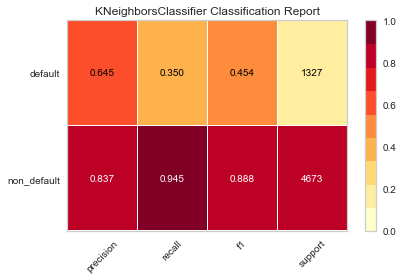

For k =  100 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  100 and metric =  cosine :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  10 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  20 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  50 and metric =  manhattan :
For k =  100 and metric =  manhattan :
For k =  100 and metric =  manhattan :
For k =  100 and metric =  manhattan :
For k =  100 and metric =  manhattan :
For k =  100 and metric =  manhattan :
Max accuracy is: 0.8136666666666666


In [38]:
parameters = [10, 20, 50, 100]
metrics = ['euclidean', 'cosine', 'manhattan']
max_acc_knn = 0 
max_met =[]
max_k = 0
max_recall_knn=0
for met in metrics:
    for K in parameters:
        for train_indices, test_indices in cv_object.split(X,y): 
            X_train = X[train_indices]
            y_train = y[train_indices]
            X_test = X[test_indices]
            y_test = y[test_indices]   
            X_train_scaled = scl_obj.transform(X_train) # apply to training
            X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)
            print("For k = ", K, "and metric = ", met, ":")
            knn = KNeighborsClassifier(n_neighbors= K, weights='uniform', metric=met)
            knn.fit(X_train_scaled,y_train)
            y_hat = knn.predict(X_test_scaled)
            acc = mt.accuracy_score(y_test,y_hat)
            rcl = mt.recall_score(y_test, y_hat)
            conf = mt.confusion_matrix(y_test,y_hat)
            #print('accuracy:', acc )
            #print(conf)
            
        
            #if acc>max_acc_knn :
            if rcl>max_recall_knn :
                max_acc_knn = acc
                max_recall_knn = rcl
                max_met = met
                max_k = K
                knn_trn_idx_max_acc = train_indices
                knn_tst_idx_max_acc = test_indices
                ClassReport = mt.classification_report(y_test,y_hat)
                print(ClassReport)
                
                knn_cl_reporter = ClassificationReport(knn, classes=['non_default' , 'default'], support=True)
                knn_cl_reporter.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
                knn_cl_reporter.score(X_test_scaled, y_test)        # Evaluate the model on the test data
                knn_cl_reporter.show()  
             

    
print("Max accuracy is:", max_acc_knn)

We see that from above metrics, that the recall didnt much from the initial k value and the corresponding metric. We evaluated for nearest neighbors as 10,20,50 & 100 and metric as cosine, euliciean and manhattan. Either of the metric provided a better recall. Even thugh the accuracy is high, the recall is the right metric to see the class. As we have already mentioned many times that the datset is imbalance with 79% non-default data, incidating theat the accuracy of 81% may not yield right results if the model is biased towards non-default.even though we ensured the k-fold strification but still it wont hold good.Lets see what parameters are important using the gridsearch for knn.

**KNN Classification Parameter evaluation with GridSearch**

In [45]:
#GridSearch for KNN classifier

#KNN Classification 5-fold cross-validation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
import warnings
warnings.filterwarnings('ignore')

ClsEstimator = KNeighborsClassifier()#(n_jobs = -1)

parameters = { 'n_neighbors':[3, 5, 13]
              ,'weights': ['uniform','distance']
              ,'leaf_size': [10, 30]
              ,'metric': ['euclidean','manhattan','cosine']
             }
#Create a grid search object  
from sklearn.model_selection import GridSearchCV
ClsGridSearch = GridSearchCV(estimator=ClsEstimator
                   , n_jobs=10 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object # KFolds = 5
                   , scoring='recall')

#Perform hyperparameter search to find the best combination of parameters for our data
ClsGridSearch.fit(df_mcc_X_knn_scaled, mcc_Y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 180 out of 180 | elapsed: 10.2min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=11, test_size=0.2,
            train_size=0.8),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=10,
             param_grid={'leaf_size': [10, 30],
                         'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [3, 5, 13],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [46]:
ClsGridSearchEst = ClsGridSearch.best_estimator_
print(ClsGridSearchEst)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


Re-running the KNN model using the optimized parameter based on GridSearch evaluation.

In [133]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, precision_recall_fscore_support

X=mcredit.as_matrix().astype(np.float)
y=mcc_Y.as_matrix().astype(np.float)
yhat = np.zeros(y.shape) # initializing variable

for train, test in cv_object.split(X,y):
    # Use Results parameters from GridSearch to run KNN Classifier model
    clf_knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='cosine',
                                   metric_params=None, n_jobs=None, n_neighbors=3, p=2,weights='distance')
    clf_knn.fit(X[train],y[train])
    yhat[test] = clf_knn.predict(X[test])

total_accuracy = mt.accuracy_score(y, yhat)
total_precision = precision_score(y, yhat,average='weighted')
total_recall = recall_score(y, yhat,average='weighted')
classification_rpt = classification_report(y, yhat)
print ("KNN accuracy with corresponding parameter settings")
print('KNN classifier accuracy with optimal parameters is: %.3f'%(total_accuracy))
print('KNN classifier precision with optimal parameters is: %.3f'%(total_precision))
print('KNN classifier recall with optimal parameters is: %.3f'%(total_recall))
print('KNN classifier classsification report with optimal parameters is: \n',(classification_rpt))

KNN accuracy with corresponding parameter settings
KNN classifier accuracy with optimal parameters is: 0.746
KNN classifier precision with optimal parameters is: 0.692
KNN classifier recall with optimal parameters is: 0.746
KNN classifier classsification report with optimal parameters is: 
               precision    recall  f1-score   support

         0.0       0.79      0.91      0.85     23364
         1.0       0.34      0.16      0.21      6636

    accuracy                           0.75     30000
   macro avg       0.57      0.54      0.53     30000
weighted avg       0.69      0.75      0.71     30000



Based on the recall score, knn didnt perform that well when compared to random forest. The recall is at 0.16 in knn where as in random forest it is around 0.60. 

### Regression

For regression, we will explore the following models to predict what is the amount a customer tends to pay for the current month given its history for previous payments.

1. Random Forest 
       
2. Decision Tree

3. KNN

We will define the X_train and Y_train from the original data set to test for X_test from the modified dataset. We will look at R-Squared, RMSE and MAE to evaluate the model and represent the interpretation.

#### 1.Random Forest

In [62]:
## Random forest regression models with different parameters 

iter_num=0
times_rec=[]
 
rf_reg_max_score = 0
rf_reg_trn_idx_max_acc = []
rf_reg_tst_idx_max_acc  = []
rf_reg_estimator_for_max = 0
rf_reg_max_depth_max = 0

#for loop 
estimators = [100, 500, 1000]
max_depths = [6]
for estimator , max_depth  in zip(estimators*len(max_depths),max_depths* len(estimators)):
    for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
        
         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, 
                                              random_state=0)
        random_forest.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = random_forest.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = random_forest.score(X_reg_test,y_reg_test)
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        if score > rf_reg_max_score :
            rf_reg_trn_idx_max_acc = train_index
            rf_reg_tst_idx_max_acc = test_index
            rf_reg_estimator_for_max = estimator
            rf_reg_max_depth_max = max_depth
            
        iter_num+=1

The time it takes to fit and predict for iteration 0 is 8.40267562866211 score is 0.5997661158057497 
The time it takes to fit and predict for iteration 1 is 8.559009790420532 score is 0.6337163682452862 
The time it takes to fit and predict for iteration 2 is 8.619995355606079 score is 0.5169745960039756 
The time it takes to fit and predict for iteration 3 is 8.953776359558105 score is 0.2492567663314348 
The time it takes to fit and predict for iteration 4 is 9.028244495391846 score is 0.6318515662446746 
The time it takes to fit and predict for iteration 5 is 63.93168663978577 score is 0.5988382469851721 
The time it takes to fit and predict for iteration 6 is 104.66005659103394 score is 0.6311661190639724 
The time it takes to fit and predict for iteration 7 is 109.93748331069946 score is 0.4961030625633734 
The time it takes to fit and predict for iteration 8 is 109.33102321624756 score is 0.30328311807007147 
The time it takes to fit and predict for iteration 9 is 105.0428574085

R^2 has improved for every iteration with soem deviations. The best R^2 calculated is at 64% indicating that the target variable is positively correlated. Apart from this metric, we can look at the MSE & RMSE values to determine the fit as mentioned in evaluation topic. RMSE looks ok given that the PAY_AMT1 is little skewed. We will use consolidated metrics to evauluate the model.

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_reg_test, y_reg_hat))

8874.805608717128

**Change the max_depth to 8**

In [145]:
## Random forest regression models with different parameters 

iter_num=0
times_rec=[]
 
rf_reg_max_score = 0
rf_reg_trn_idx_max_acc = []
rf_reg_tst_idx_max_acc  = []
rf_reg_estimator_for_max = 0
rf_reg_max_depth_max = 0

#for loop 
estimators = [100, 500, 1000]
max_depths = [8]
for estimator , max_depth  in zip(estimators*len(max_depths),max_depths* len(estimators)):
    for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
        
         #we count the time in executing the logistic regression
        t0 = time()
        random_forest = RandomForestRegressor(n_estimators=estimator, max_depth=max_depth, 
                                              random_state=0)
        random_forest.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = random_forest.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = random_forest.score(X_reg_test,y_reg_test)
        print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        if score > rf_reg_max_score :
            rf_reg_trn_idx_max_acc = train_index
            rf_reg_tst_idx_max_acc = test_index
            rf_reg_estimator_for_max = estimator
            rf_reg_max_depth_max = max_depth
            
        iter_num+=1

The time it takes to fit and predict for iteration 0 is 25.10680890083313 score is 0.6256584668883389 
The time it takes to fit and predict for iteration 1 is 19.073343515396118 score is 0.6947743867001245 
The time it takes to fit and predict for iteration 2 is 17.910361528396606 score is 0.5805605230064438 
The time it takes to fit and predict for iteration 3 is 24.567821979522705 score is 0.3092014747238192 
The time it takes to fit and predict for iteration 4 is 19.54655385017395 score is 0.6922468750980848 
The time it takes to fit and predict for iteration 5 is 88.58668351173401 score is 0.6342834787495719 
The time it takes to fit and predict for iteration 6 is 101.51962637901306 score is 0.6905657256100748 
The time it takes to fit and predict for iteration 7 is 90.00351762771606 score is 0.5689272475347555 
The time it takes to fit and predict for iteration 8 is 92.42403101921082 score is 0.35835905382035005 
The time it takes to fit and predict for iteration 9 is 95.233372449

R^2 has improved for every iteration with soem deviations. The best R^2 calculated is at 69% indicating that the target variable is positively correlated. Apart from this metric, we can look at the MSE & RMSE values to determine the fit as mentioned in evaluation topic. The RMSE is lower for max_depth=8 than max_depth=6, indicating a better model. 

In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_reg_test, y_reg_hat))

8264.064783161284

####  Decision Tree Regession 

Decision tree regression is used to regress using a sine curve. Some additional noisy points are used to fit the local linear regression approximations.
if max depth parameter is too high it may end up overfitting the model for noise.

In [140]:
iter_num=0
times_rec=[]
 
dt_reg_max_acc = 0
dt_reg_trn_idx_max_acc = []
dt_reg_tst_idx_max_acc  = []
dt_reg_max_depth_max = 0

#for loop 
estimators = [100,  1000]
max_depths = [4]
for   max_depth  in max_depths:
    for test_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeRegressor(max_depth=max_depth, 
                                              random_state=0)
        decision_tree.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = decision_tree.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = decision_tree.score(X_reg_test,y_reg_test)
        
        print ("The time it takes to fit and predict for iteration {} is {} score is {} for max_depth {} ".format(iter_num, diff[0],score,max_depth)) 
        
        if dt_reg_max_acc> score:
            dt_reg_trn_idx_max_acc = train_index
            dt_reg_tst_idx_max_acc = test_index
            dt_reg_max_depth_max = max_depth
        iter_num+=1

The time it takes to fit and predict for iteration 0 is 0.12036991119384766 score is 0.46478062315982854 for max_depth 4 
The time it takes to fit and predict for iteration 1 is 0.16051268577575684 score is 0.22074593407294296 for max_depth 4 
The time it takes to fit and predict for iteration 2 is 0.15542030334472656 score is 0.21216605536977862 for max_depth 4 
The time it takes to fit and predict for iteration 3 is 0.13441109657287598 score is 0.1591578813376071 for max_depth 4 
The time it takes to fit and predict for iteration 4 is 0.12935853004455566 score is 0.1735403329021974 for max_depth 4 


R^2 has improved for every iteration with some deviations. The best R^2 calculated is at 46% indicating that the target variable is positively correlated. Apart from this metric, we can look at the MSE & RMSE values to determine the fit as mentioned in evaluation topic. The data may be skewed for PAY_AMT1. We can further do log transformation to get better results. For the current analysis, we will use the reguslar non-transformation column.

The iterations above show that for max_depth 8 we have better accuracy than max_depth=4. 

In [141]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_reg_test, y_reg_hat))

13504.904020132042

**Changing the paramter for max_depth=8**

In [142]:
iter_num=0
times_rec=[]
 
dt_reg_max_acc = 0
dt_reg_trn_idx_max_acc = []
dt_reg_tst_idx_max_acc  = []
dt_reg_max_depth_max = 0

#for loop 
estimators = [100,  1000]
max_depths = [8]
for   max_depth  in max_depths:
    for test_index, test_index in cv_object_reg.split(X_reg,y_reg): 
        X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
        y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]
         
         #we count the time in executing the logistic regression
        t0 = time()
        decision_tree = DecisionTreeRegressor(max_depth=max_depth, 
                                              random_state=0)
        decision_tree.fit(X_reg_train,y_reg_train)  # train object
        y_reg_hat = decision_tree.predict(X_reg_test) # get test set precitions
        t1=time()
        diff=np.array([t1-t0])
        times_rec=np.append(times_rec,diff)
        # now let's get the accuracy and confusion matrix for this iterations of training/testing
        score = decision_tree.score(X_reg_test,y_reg_test)
        
        print ("The time it takes to fit and predict for iteration {} is {} score is {} for max_depth {} ".format(iter_num, diff[0],score,max_depth)) 
        
        if dt_reg_max_acc> score:
            dt_reg_trn_idx_max_acc = train_index
            dt_reg_tst_idx_max_acc = test_index
            dt_reg_max_depth_max = max_depth
        iter_num+=1

The time it takes to fit and predict for iteration 0 is 0.27925920486450195 score is 0.8488682150430106 for max_depth 8 
The time it takes to fit and predict for iteration 1 is 0.2151179313659668 score is 0.7234379971590931 for max_depth 8 
The time it takes to fit and predict for iteration 2 is 0.3480224609375 score is 0.7853238974828124 for max_depth 8 
The time it takes to fit and predict for iteration 3 is 0.2657454013824463 score is 0.7329481721720925 for max_depth 8 
The time it takes to fit and predict for iteration 4 is 0.2563028335571289 score is 0.546940111969308 for max_depth 8 


R^2 has improved for every iteration with some deviations. The best R^2 calculated is at 84% indicating that the target variable is positively correlated. 
The iterations above show that for max_depth 8 we have better accuracy than max_depth=4. The RMSE is lower for max_depth=8 than max_depth=4. It is around 9999 vs 13504.

In [143]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_reg_test, y_reg_hat))

9999.043935445217

**KNN**

KNN can be used for both classification and regression problems. The algorithm uses ‘feature similarity’ to predict values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

In [80]:
iter_num=0
times_rec=[]
 
max_acc_knn_reg = 0 
max_met_reg =[]
max_k_reg = 0
max_recall_knn_reg=0
knn_trn_idx_max_acc_reg = []
knn_tst_idx_max_acc_reg = []

#for loop 
parameters = [10, 20, 50, 100]
metrices = ['euclidean', 'cosine', 'manhattan']
for met in metrices:
    for K in parameters:
        for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
            X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
            y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]

         #we count the time in executing the logistic regression
            t0 = time()
            knn = KNeighborsRegressor(n_neighbors= K, weights='uniform', metric=met)
            knn.fit(X_reg_train,y_reg_train)  # train object
            y_reg_hat = knn.predict(X_reg_test) # get test set precitions
            t1=time()
            diff=np.array([t1-t0])
            times_rec=np.append(times_rec,diff)
            # now let's get the accuracy and confusion matrix for this iterations of training/testing
            score = knn.score(X_reg_test,y_reg_test)
        
            print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        
            if  score> max_acc_knn_reg:
                
                max_acc_knn_reg = score
                #max_recall_reg = rcl
                max_met_reg = met
                max_k_reg = K
                knn_trn_idx_max_acc_reg = train_index
                knn_tst_idx_max_acc_reg = test_index
            iter_num+=1

The time it takes to fit and predict for iteration 0 is 1.487074613571167 score is 0.4284676801341507 
The time it takes to fit and predict for iteration 1 is 1.324385166168213 score is 0.5545919887140822 
The time it takes to fit and predict for iteration 2 is 1.4002606868743896 score is 0.5277109853893562 
The time it takes to fit and predict for iteration 3 is 1.3877418041229248 score is 0.5241809839377356 
The time it takes to fit and predict for iteration 4 is 1.3680062294006348 score is 0.49829821939666624 
The time it takes to fit and predict for iteration 5 is 1.6122245788574219 score is 0.3899035965314246 
The time it takes to fit and predict for iteration 6 is 1.8508446216583252 score is 0.4934832208731494 
The time it takes to fit and predict for iteration 7 is 1.6781964302062988 score is 0.501502607926068 
The time it takes to fit and predict for iteration 8 is 1.5671682357788086 score is 0.47545849122875367 
The time it takes to fit and predict for iteration 9 is 1.5845413

R^2 has worst performace with very low correlation. The best R^2 calculated is at 46% indicating that the target variable is positively correlated however this metric is only of the performace measurement. Apart from this metric, we will look at the MSE & RMSE values to determine the fit as mentioned in evaluation topic. The data may be skewed for PAY_AMT1. Doing log transformation on the response variable.

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_reg_test, y_reg_hat))

13034.228136708572

Based on all the metrics of all these combination, Decision tree has better metrics based on R^2 and RMSE. Note that the PAY_AMT1 is skewed.

**KNN Regression Parameter changed weights=distance**

In [137]:
iter_num=0
times_rec=[]
 
max_acc_knn_reg = 0 
max_met_reg =[]
max_k_reg = 0
max_recall_knn_reg=0
knn_trn_idx_max_acc_reg = []
knn_tst_idx_max_acc_reg = []

#for loop 
parameters = [10, 20, 50, 100]
metrices = ['euclidean', 'cosine', 'manhattan']
for met in metrices:
    for K in parameters:
        for train_index, test_index in cv_object_reg.split(X_reg,y_reg): 
            X_reg_train, X_reg_test = X_reg[train_index], X_reg[test_index]
            y_reg_train, y_reg_test = y_reg[train_index], y_reg[test_index]

         #we count the time in executing the logistic regression
            t0 = time()
            knn = KNeighborsRegressor(n_neighbors= K, weights='distance', metric=met)
            knn.fit(X_reg_train,y_reg_train)  # train object
            y_reg_hat = knn.predict(X_reg_test) # get test set precitions
            t1=time()
            diff=np.array([t1-t0])
            times_rec=np.append(times_rec,diff)
            # now let's get the accuracy and confusion matrix for this iterations of training/testing
            score = knn.score(X_reg_test,y_reg_test)
        
            print ("The time it takes to fit and predict for iteration {} is {} score is {} ".format(iter_num, diff[0],score)) 
        
            if  score> max_acc_knn_reg:
                
                max_acc_knn_reg = score
                #max_recall_reg = rcl
                max_met_reg = met
                max_k_reg = K
                knn_trn_idx_max_acc_reg = train_index
                knn_tst_idx_max_acc_reg = test_index
            iter_num+=1

The time it takes to fit and predict for iteration 0 is 1.0704381465911865 score is 0.43770303557502216 
The time it takes to fit and predict for iteration 1 is 1.2333664894104004 score is 0.5657128483036182 
The time it takes to fit and predict for iteration 2 is 1.0472047328948975 score is 0.5296004805791141 
The time it takes to fit and predict for iteration 3 is 1.1816844940185547 score is 0.5249217129800472 
The time it takes to fit and predict for iteration 4 is 1.1796207427978516 score is 0.5069558002890922 
The time it takes to fit and predict for iteration 5 is 1.3755340576171875 score is 0.40317319606032204 
The time it takes to fit and predict for iteration 6 is 1.0095763206481934 score is 0.5113983785690976 
The time it takes to fit and predict for iteration 7 is 1.5393154621124268 score is 0.510951270254269 
The time it takes to fit and predict for iteration 8 is 1.576354742050171 score is 0.4906076523082617 
The time it takes to fit and predict for iteration 9 is 1.527398

After parameter change from uniform to distance, we see that the R^2 is improved.The best R^2 calculated is at 56% indicating that the target variable is positively correlated. Also the score on distance indicates the weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. The MSE below is little lower than the previous weight uniform 12892 vs 13034. With respect to it, we can say that the performance of the model is slightly invoved by changing the weights.

In [138]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(y_reg_test, y_reg_hat))

12892.214450067118

***
# Modeling and Evaluation 4
*Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.*

Analysis of the performance of the model is done based on different crieteria. Since our classificalation classes are unbalanced and number of defaults are much less than number of non defaults and our obective is to get most of the default cases which is of rarer nature , recall is more important crieteria.

For classification task we have created precision recall curve , confusion matrix, classification report and ROAAUC plot for the best performing model. 

For Regression tasks we have created Residual plot and Prediction error plots. 

#### Classification Evaluation
**Random Forest**

The below results show the best accuracy based on best paramters and their results.

**Precision Recall Curve**

Lookng at the Precison recall curve in above we can see that as the increase threshold for predicting default the recall value increases but the precision decreases. Since there are close to 22% cases that are default and our objective is to find more and more default cases we want to keep our thresold to appropriate limit. From above precision recall curve it turns out that we set our thresold of 50% then we can achieve a recall of 50%.

running model for max accuracy 0
parameters for the model with best accuracy is num_estimators 1000 , max_depth 5 and class_weight
The time it takes to fit and predict for iteration 60  is 16.727798223495483 
classification report for iteration 60 


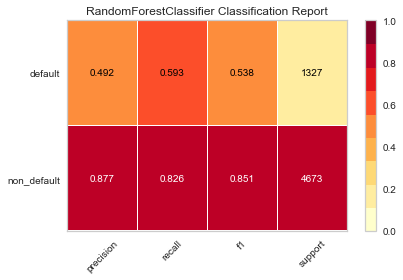

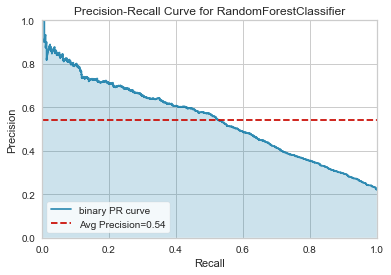

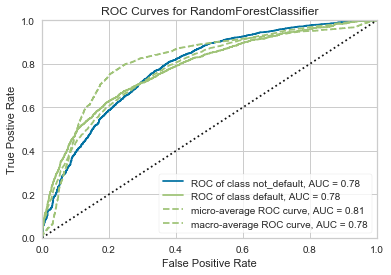

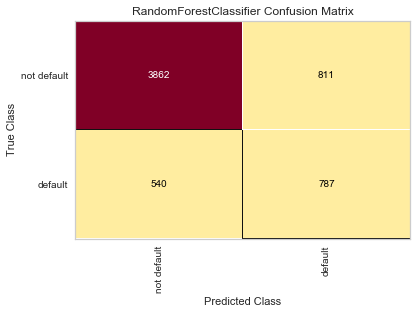

In [82]:
t0 = time()


X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]

print ('running model for max accuracy {}'.format(rf_max_acc))
print('parameters for the model with best accuracy is num_estimators {} , max_depth {} and class_weight'.format(
    rf_estimator_for_max, rf_max_depth_max,  rf_class_weight_max))

random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)


random_forest.fit(X_train,y_train)  # train object
y_hat = random_forest.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])

print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)


# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))

rf_cl_reporter = ClassificationReport(random_forest, classes=['non_default' , 'default'], support=True)

rf_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
rf_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
rf_cl_reporter.show()   

pr_curve = PrecisionRecallCurve(random_forest)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()


roc_curve = ROCAUC(random_forest, classes=["not_default", "default"])
roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 


cm = ConfusionMatrix(random_forest, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()


**ROC AUC** 
Area under curve for Random forest classification model is 0.77 which indicates it to be a good model. 

**Classification Report**

classification report for this model is shoes F1 score apart from precision and recall.F1 score for Random forest model is 0.53. F1 score combines precision and recall parameters to give one common indicator. It is harmonic mean of precision and recall so this value is always between those two.

**Confusion matrix**
We can calculate other Parameters using precison , recall , specifity , true positive rate , false positive rate etc. using Confusion matrix. In case of our best Random forest model based on recall score We correctly predicted 776 out of 1337 defaults cases.

***
#### Decision Tree

Following are the analysis results for the best decision tree model based on the recall value:

**Precision Recall Curve**

Precision Recall curve for decision Tree. Shows that the best estimate for recall and precision is constant till the thresold of 0.4 and drops after that. Based on Precison and recall curve we can say that Random forest is the better model than the decision tree for this classification

Running model for max decision tree accuracy model 0
Parameters for decision tree for max accuracy class_weight None
The time it takes to fit and predict for iteration 60  is 0.449371337890625 
accurancy for balanced class is 0.7255
classification report for iteration 60 


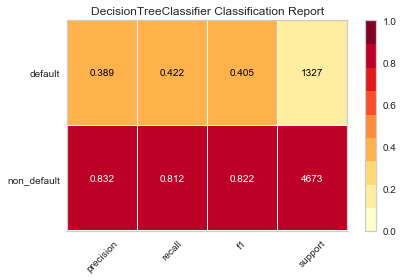

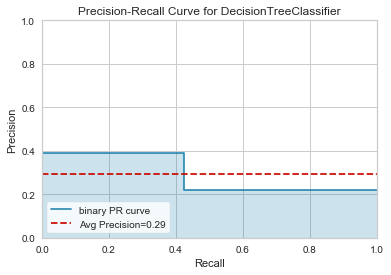

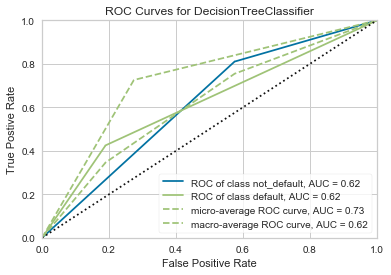

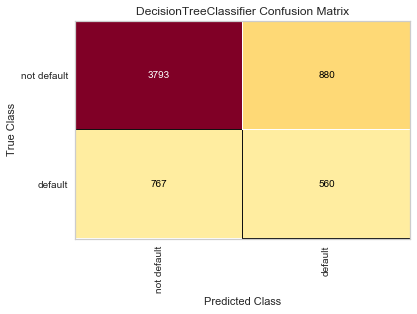

In [83]:
t0 = time()

print('Running model for max decision tree accuracy model {}'.format(dt_max_acc  ))
 
print('Parameters for decision tree for max accuracy class_weight {}'.format(dt_class_weight_for_max  ))


X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)

decision_tree.fit(X_train,y_train)  # train object
y_hat = decision_tree.predict(X_test) # get test set precitions

t1=time()
diff=np.array([t1-t0])
print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)
# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print("accurancy for balanced class is {}".format(acc))
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))
dt_cl_reporter = ClassificationReport(decision_tree, classes=['non_default' , 'default'], support=True)

dt_cl_reporter.fit(X_train, y_train)        # Fit the visualizer and the model
dt_cl_reporter.score(X_test, y_test)        # Evaluate the model on the test data
dt_cl_reporter.show()  

pr_curve = PrecisionRecallCurve(decision_tree)
pr_curve.fit(X_train, y_train)
pr_curve.score(X_test, y_test)
pr_curve.show()

roc_curve = ROCAUC(decision_tree, classes=["not_default", "default"])

roc_curve.fit(X_train, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test, y_test)        # Evaluate the model on the test data
roc_curve.show() 

cm = ConfusionMatrix(decision_tree, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
# How did we do?
cm.show()

iter_num+=1

**ROC AUC**
Area under curve for Random forest classification model is 0.62 which indicates it to be a slightly better than random prediction model sonce area under curve is only slghtly greater than 0.5. 

**Classification Report**

classification report for this model is shoes F1 score apart from precision and recall.F1 score for Random forest model is 0.39 which is worse than that for random forest model. F1 score combines precision and recall parameters to give one common indicator. It is harmonic mean of precision and recall so this value is always between those two.

**Confusion matrix**
We can calculate other Parameters using precison , recall , specifity , true positive rate , false positive rate etc. using Confusion matrix. In case of our best Random forest model based on recall score We correctly predicted 563 out of 1327 defaults cases.

**KNN**

Following are the analysis results for the best decision tree model based on the recall value:


**Precision Recall curve**. Shows that the best estimate for recall and precision is constant till the thresold of 0.25. Based on Precison and recall curve we can say that Random forest is the better model than the KNN for this classification. It is the worst performing model based onthe plot.

Running model for max KNN accuracy model 0.8136666666666666
Parameters for KNN for max accuracy metric = cosine K=  
The time it takes to fit and predict for iteration 61  is 3.1629574298858643 
accurancy for balanced class is 0.778
classification report for iteration 61 


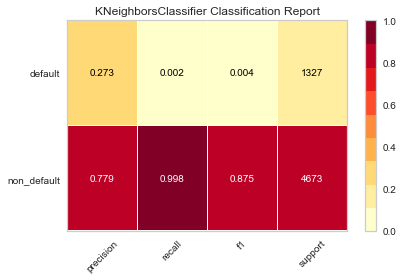

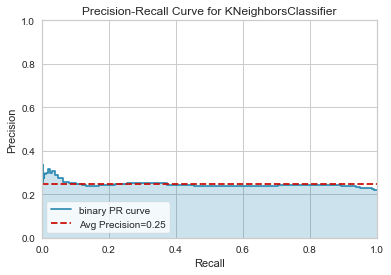

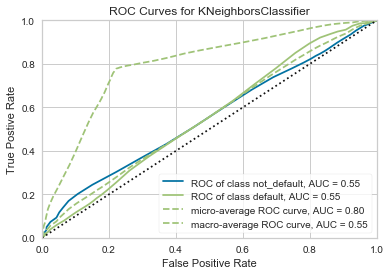

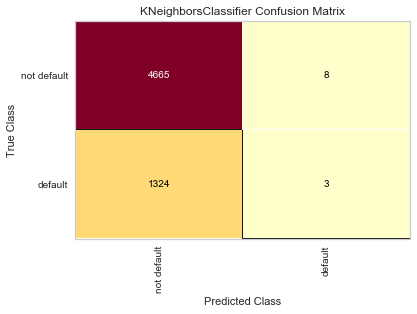

In [88]:
 
t0 = time()

print('Running model for max KNN accuracy model {}'.format(max_acc_knn  )) 
print('Parameters for KNN for max accuracy metric = {} K=  '.format(max_met , max_k ))


X_train, X_test = X[knn_trn_idx_max_acc], X[knn_tst_idx_max_acc]
y_train, y_test = y[knn_trn_idx_max_acc], y[knn_tst_idx_max_acc]

#X_train_scaled = scl_obj.transform(X_train) # apply to training
#X_test_scaled = scl_obj.transform(X_test)
    
knn = KNeighborsClassifier(n_neighbors= max_k, weights='uniform', metric=max_met)
#X_train_scaled = scl_obj.transform(X_train) # apply to training
#X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)
knn.fit(X_train,y_train)
y_hat = knn.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


t1=time()
diff=np.array([t1-t0])
print ("The time it takes to fit and predict for iteration {}  is {} ".format(iter_num, diff[0])) 
times_rec=np.append(times_rec,diff)
# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
print("accurancy for balanced class is {}".format(acc))
conf = mt.confusion_matrix(y_test,y_hat)
print ("classification report for iteration {} ".format(iter_num))
knn_cl_reporter = ClassificationReport(knn, classes=['non_default' , 'default'], support=True)

knn_cl_reporter.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
knn_cl_reporter.score(X_test_scaled, y_test)        # Evaluate the model on the test data
knn_cl_reporter.show()  

pr_curve = PrecisionRecallCurve(knn)
pr_curve.fit(X_train_scaled, y_train)
pr_curve.score(X_test_scaled, y_test)
pr_curve.show()

roc_curve = ROCAUC(knn, classes=["not_default", "default"])

roc_curve.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
roc_curve.score(X_test_scaled, y_test)        # Evaluate the model on the test data
roc_curve.show() 

cm = ConfusionMatrix(knn, classes=['not default' , 'default'])
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)
# How did we do?
cm.show()

iter_num+=1

**ROC AUC**
Area under curve for Random forest classification model is 0.55 which indicates it to be a slightly better than random prediction model sonce area under curve is only slghtly greater than 0.5 but not the best. It is slightly over the mid value and cannot predict the classes correctly.

**Classification Report**

classification report for this model is shoes F1 score apart from precision and recall.F1 score for Random forest model is 0.04 which is worse than that for random forest model. F1 score combines precision and recall parameters to give one common indicator. It is harmonic mean of precision and recall so this value is always between those two.

**Confusion matrix**
We can calculate other Parameters using precison , recall , specifity , true positive rate , false positive rate etc. using Confusion matrix. In case of our best Random forest model based on recall score We correctly predicted 3 out of 1327 defaults cases. We have to look further to see if we can finetune any of the parameters provided by grid search as this is not an acceptable model.

#### Regression Tasks 

We evaluated our Regression models based on the residual and Prediction errors for the model.

**Random Forest Regression**

running model for max score 0
parameters for the model with best accuracy is num_estimators 1000 , max_depth 8


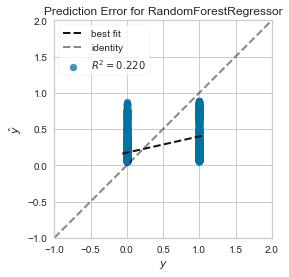

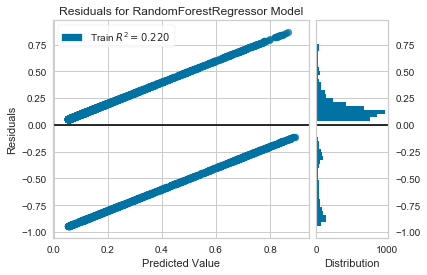

In [148]:
t0 = time()

X_train, X_test = X[rf_reg_trn_idx_max_acc], X[rf_reg_tst_idx_max_acc]
y_train, y_test = y[rf_reg_trn_idx_max_acc], y[rf_reg_tst_idx_max_acc]

print ('running model for max score {}'.format(rf_reg_max_score))
print('parameters for the model with best accuracy is num_estimators {} , max_depth {}'.format(
    rf_reg_estimator_for_max, rf_reg_max_depth_max))

random_forest = RandomForestRegressor(n_estimators=rf_reg_estimator_for_max, max_depth=rf_reg_max_depth_max, 
                                              random_state=0)


rf_pred_error = PredictionError(random_forest)

rf_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
rf_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
rf_pred_error.show() 

res_plt = ResidualsPlot(random_forest)
res_plt.fit(X_test, y_test)
res_plt.show()

Based on R squared value it looks the Random forest model is not the best for prediction of PAY_amount value. it looks line there is some linear relation in payment values and the plots show evdient results.

**Decision Tree Regression**

R squared value for decision tree model is even lower than that for random forest model. This indicates that even decision tree model is not the best model for the regression task. We might analyse and use other model for better prediction of these values.

In [ ]:
t0 = time()
 
X_train, X_test = X[dt_reg_trn_idx_max_acc], X[dt_reg_tst_idx_max_acc]
y_train, y_test = y[dt_reg_trn_idx_max_acc], y[dt_reg_tst_idx_max_acc]

print ('running model for max score {}'.format(dt_reg_max_acc))
print('parameters for the model with best accuracy is   max_depth {}'.format( dt_reg_max_depth_max))

decision_tree = DecisionTreeRegressor(max_depth=dt_reg_max_depth_max, 
                                              random_state=0)

rf_pred_error = PredictionError(decision_tree)

rf_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
rf_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
rf_pred_error.show() 

res_plt = ResidualsPlot(decision_tree)
res_plt.fit(X_test, y_test)
res_plt.show()

In [150]:
Image(url ='./images/DTReg.png')

**KNN Regression**


In [ ]:
t0 = time()
 

X_train, X_test = X[knn_trn_idx_max_acc_reg], X[knn_tst_idx_max_acc_reg]
y_train, y_test = y[knn_trn_idx_max_acc_reg], y[knn_tst_idx_max_acc_reg]
 
#print ('running model for max score {}'.format(knn_reg_max_score))
print('parameters for the model with best accuracy is met {} , K {}'.format(
    max_met_reg, max_k_reg))

### fix this 
knn = KNeighborsRegressor(n_neighbors= max_k_reg, weights='distance', metric=max_met_reg)

knn_pred_error = PredictionError(knn)

knn_pred_error.fit(X_train, y_train)  # Fit the training data to the visualizer
knn_pred_error.score(X_test, y_test)  # Evaluate the model on the test data
knn_pred_error.show() 

res_plt = ResidualsPlot(knn)
res_plt.fit(X_test, y_test)
res_plt.show()

In [151]:
Image(url ='./images/KNNReg.png')

***
# Modeling and Evaluation 5
*Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.*

**Model Advantages**

**1. KNN**

* Simple Algorithm that predicts unknown data points based on its K nearest neighbours.
* No assumptions based on underlying data distribution.
* Non-Parametric method

The main drawback is the that it is sensitive to noisy data, missing values and outliers. Along with it does not work well with high dimensions and large dataset.

**2. Random Forests**

* Can be used for both classification and regression.
* Simple but intuitive models that utilize a top-down approach in which the root node creates a binary split until a certain criteria is met.
* Robust to outliers and non-linear data
* Handles imbalance data with low bias and moderate variance.

We see that our models worked best with Random Forest classifier with balance of class weight and max depth as the top few parameters which are leveraged but we need to make sure we do not overfit and tune the hyperparamters.


**3.Decision Tree**

* Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
* Does not require normalization of data and scaling of data as well.
* Missing values in the data also does NOT affect the process of building decision tree to any considerable extent.

Based on the above evaluation, we see that it takes longer time to complete and the predictions for regression was inadequate and work performing. Of all the regression models, decision tree was work performing inturns of performance of the model and execution.

From the classification, the best model which performed better than the all the models is **random forest**. Clearly it is the winner interms of precison, recall and accuracy. As mentioned above, we have identified recall as the measure on which we are evaluating the models. It was able to identify the classes equally whether it is default or non-default.

Lets verify the models with 95% confidence intervals to further evaluate the models and model accuracy (another measure than recall) comparision between the models to explore more.

The below functions are defined for comparing the accuracy between the 3 models:

In [95]:
def modelCiComp(modelResults):
    for i in range(len(classModelResults[0])):
        for j in range(i+1, len(classModelResults[1])):
            m1Acc = classModelResults[1][i]
            m2Acc = classModelResults[1][j]
            d = m1Acc - m2Acc
            dBar = np.mean(d)
            v = np.var(d)
            ci = (1/sqrt(len(m1Acc)))*stats.t.ppf(q = .975, df = len(m1Acc) - 1)*sqrt(v)
            ci = "[" + str(round(dBar - ci, 5)) + ", " + str(round(dBar + ci, 5)) + "]"
            print("95% CI for", classModelResults[0][i], "vs", classModelResults[0][j], "=", ci)
            
# Response time category model summary CI function            
def modelCiComp_1(modelResults):
    for i in range(len(classModelResults_R[0])):
        for j in range(i+1, len(classModelResults_R[1])):
            m1Acc = classModelResults_R[1][i]
            m2Acc = classModelResults_R[1][j]
            d = m1Acc - m2Acc
            dBar = np.mean(d)
            v = np.var(d)
            ci = (1/sqrt(len(m1Acc)))*stats.t.ppf(q = .975, df = len(m1Acc) - 1)*sqrt(v)
            ci = "[" + str(round(dBar - ci, 5)) + ", " + str(round(dBar + ci, 5)) + "]"
            print("95% CI for", classModelResults_R[0][i], "vs", classModelResults_R[0][j], "=", ci)

In [96]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ***********MODELS FUNCTION*************
# evaluate each model in turn
def Results_analysis(fmodels, fscoring, fX, fy):
    results = []
    names = []
    #scoring = 'accuracy'
    for name, model in fmodels:
        if (fscoring == 'accuracy'):
            skf = StratifiedKFold(n_splits=10, random_state=seed)
        else:
            skf = 10
        cv_results = model_selection.cross_val_score(model, fX, fy, cv=skf, scoring=fscoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    sns.boxplot(x=names, y=results, palette="Set1")
    plt.show()
    
    return [names, results]

KNN: 0.731667 (0.005159)
RF: 0.773638 (0.015562)
DecisionTree: 0.725902 (0.010288)


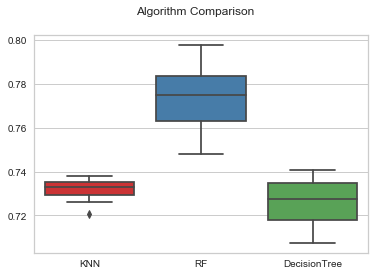

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import model_selection

seed = 7
# prepare models
class_models = []
class_models.append(('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='cosine',
                                   metric_params=None, n_jobs=None, n_neighbors=3, p=2,weights='distance')))

class_models.append(('RF', RandomForestClassifier(max_depth=6, min_samples_split=2, random_state=0, class_weight='balanced',
                             max_features='auto', n_estimators=500, bootstrap=True)))

class_models.append(('DecisionTree', DecisionTreeClassifier(random_state=0,max_features='auto')))

classModelResults = Results_analysis(class_models, 'accuracy', mcredit , mcc_Y)

Based on the above plot, Random forest is performing better in terms of accuracy as well. As we have seen already that in terms of recall as well random forest was able to classify the non-default and default values.


Lets look into the confidence intervals at 95%. Following is a comparison of Decision Tree and Random forest classifiers with same date. We are using error estimates to compare two models. The error estimates should follow Gaussian distribution. We calculate mean and standard error using the formula discussed in the class. We are caclulating confidence interval for error differences to figure out if the differences are significant We can add similar test for knn , decision tree and knn and random forest comparison.

**Decision Tree and Random Forest Comparision based on error rate**

Our model comparison is based on following formula. 
We compare d bar by taking averedge  of the differences of the error rates of the models in different folds using same training set data.
The crieteria for model comparison is difference in error rates of the models which turns out to be same as difference between accuracies of the models. 
The Null hypothesis is that all choosen models have same accuracy.
We have choosen parameters for best performing models from different classes for the comparison. These models are run multiple times based on cross validation split and corresponding accuracies from each fold are compared.

In [106]:
Image(url ='./images/model_comparison.png')

In [107]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)
    decision_tree.fit(X_train,y_train) # train object
    
    random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
    random_forest.fit(X_train,y_train) 
    
    y_hat_dt = decision_tree.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_dt = mt.accuracy_score(y_test,y_hat_dt)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_dt - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[-0.05383333333333329, -0.04066666666666674, -0.04700000000000004, -0.04049999999999998, -0.049833333333333396]
-0.04636666666666669
-1.734723475976807e-18
(-1.434589219265566, 1.3418558859322327)


As we can see above tht zero is a possible value for 95% confidence interval it means that we can't reject the null hypothesis that both the models have no difference in their error rate with 95% confidence.

**KNN  and Random Forest Comparision based on error rate**

In [108]:
iter_num=0
times_rec=[]
error_rec= [] 
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    knn = KNeighborsClassifier(n_neighbors= max_k, weights='uniform', metric=max_met)

    random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
    knn.fit(X_train,y_train) # train object

    random_forest.fit(X_train,y_train) 
    
    y_hat_knn = knn.predict(X_test) 
    y_hat_rf = random_forest.predict(X_test) 

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc_knn = mt.accuracy_score(y_test,y_hat_knn)
    acc_rf = mt.accuracy_score(y_test,y_hat_rf)
    error_rec.append(acc_knn - acc_rf)

    iter_num+=1

print(error_rec)

d_bar = sum(error_rec)/len(error_rec)
siqma_squared = sum((error_rec - d_bar))/(5-1)
print(d_bar)
print(siqma_squared)

from scipy import stats
import math

confidence_interval = ( d_bar + (1/math.sqrt(4))*stats.t.isf(.975, 4),  d_bar - (1/math.sqrt(4))*stats.t.isf(.975, 4))
print(confidence_interval)

[-0.003666666666666596, 0.008999999999999897, 0.008666666666666711, 0.005166666666666653, 0.0034999999999999476]
0.004533333333333322
0.0
(-1.383689219265566, 1.3927558859322327)


As we can see above tht zero is a possible value for 95% confidence interval it means that we can't reject the null hypothesis that both the models have no difference in their error rate with 95% confidence.

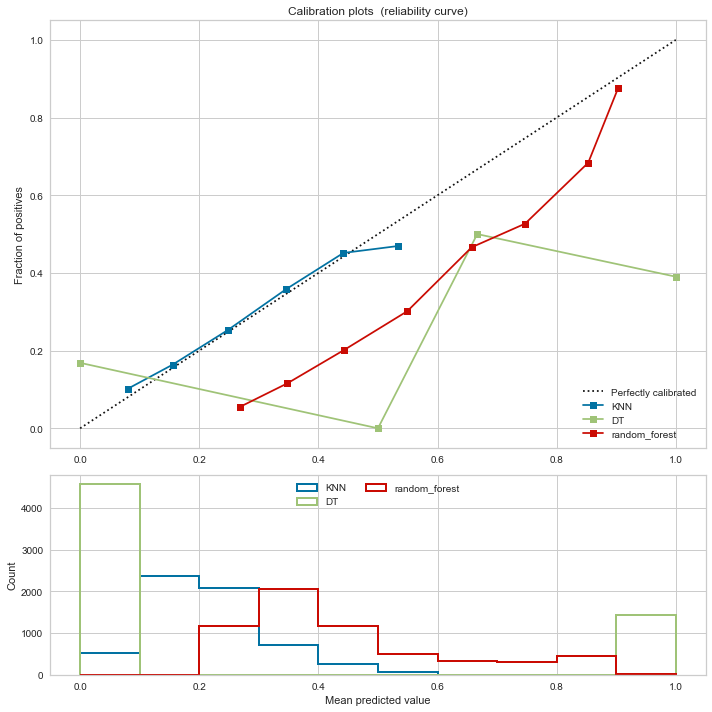

In [109]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(knn, 'KNN'),
                  (decision_tree, 'DT'),
                  (random_forest, 'random_forest')
                  ]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

***
# Modeling and Evaluation 6
*Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.*

**Feature Importance based on each classification model**

**Random Forest**

As we can see from the below graph the most important features for determining whether a person will default or not are PAY_AMT's and Limit balance. We can interpret from this model that the possibility of a person getting detault is based on his his payment of past dues more specifically the most recent one. The Most recent payment pattern is one of the major factor to determine whether a person is going to default in next month or not. The model also underlines some less important features like education , marriage and sex which don't seem to be that important in a person a chances of getting default next month. The model conclusion are aligned with common sense reasoning that a person in financial crisis is more likely to reflect that effect in his current and most recent financial transactions and the financial behavior are less of a factor of sex , marital status or education.

Also PAY_1 and PAY_AMT1 are most significant. It could be due the payment for the first period has more weightage than the other 5 payments. If the customer doesnt pay PAY_AMT1, he is more likely to default and it falls on PAY_AMT2, PAY_AMT3 and tohers. If he pays the amount, he is likely to pay the other amounts and likely not default on the payment.

In [ ]:
iter_num=0
times_rec=[]

X_train, X_test = X[rf_trn_idx_max_acc], X[rf_tst_idx_max_acc]
y_train, y_test = y[rf_trn_idx_max_acc], y[rf_tst_idx_max_acc]
 #we count the time in executing the logistic regression
t0 = time()
random_forest = RandomForestClassifier(n_estimators=rf_estimator_for_max, max_depth=rf_max_depth_max,
                         random_state=0, class_weight = rf_class_weight_max)
viz = FeatureImportances(random_forest, labels = cc.columns)
viz.fit(X_train_scaled,y_train)
viz.show()

In [125]:
Image(url ='./images/FeatureEngineeringRF.png')

**Decision Tree**

Relative of features as per the Decision Tree are almost same as that of Random forest. One distict feature of this model is that it gives more emphasis on PAY_1 attribute. which is the current payment status of a customer. The effect of this attibute averages out in case of Random forest model as that one relies on multiple decision trees and all of them this attirbute might not even be selected. The reasoning of a person getting defauled based on his current history is supported by decision tree model as well. This model also support the conclusion of Rendon forest model related to less important features of a person getting default. Sex, ,arital status and education are relatively less important. 

In [ ]:
iter_num=0
times_rec=[]
X_train, X_test = X[dt_trn_idx_max_acc], X[dt_tst_idx_max_acc]
y_train, y_test = y[dt_trn_idx_max_acc], y[dt_tst_idx_max_acc]
     
decision_tree = DecisionTreeClassifier(class_weight = dt_class_weight_for_max)
    
 #we count the time in executing the logistic regression
t0 = time()
random_forest = DecisionTreeClassifier()
viz = FeatureImportances(decision_tree, labels = cc.columns)
viz.fit(X_train,y_train)
viz.show()

In [123]:
Image(url ='./images/FeatureEngineeringDT.png')

**KNN**

In case of knn there is no output for feature importance. We run into following error when we attempt to draw graph in same way in which we did for decision tree and random forest. In case of KNN we use particular metric to determine proximity of nodes and cluster them accordingly. The distance is measured based on the difference between corresponding features.


More Insights:
PAY_1 variable has most impact on the default. Probably higher value of PAY_1 means that the customer is having outstanding since longest period of time and he has not been able to pay in full from last many months that increases his chances of defaulting in next month. This single variable seems to have the greatest impact on defaulting.

Additional Notes:
the importance of each variable, whether positive or negative, are compared against each other. From analysis, the following conclusions may be drawn in order to reduce the dimensionality of the dataset

PAY_AMT2 has weight of -0.23381316518555031

PAY_AMT1 has weight of -0.18736715912904928

LIMIT_BAL has weight of -0.13352404566744286

MARRIAGE has weight of -0.08149421078370522

EDUCATION has weight of -0.07943055435663136

PAY_AMT4 has weight of -0.05902482347547613

PAY_AMT6 has weight of -0.052313865883367616

PAY_AMT5 has weight of -0.050695283560333135

SEX has weight of -0.04976924263184584

PAY_AMT3 has weight of -0.04172415157530845

ID has weight of -0.025979429649864567

PAY_6 has weight of -0.015309773354164731

PAY_4 has weight of 0.006083933585685018

PAY_5 has weight of 0.041873705296057225

AGE has weight of 0.07509213815668006

PAY_2 has weight of 0.08191692102375

PAY_3 has weight of 0.09832286130888564

PAY_1 has weight of 0.563102920859467

* Sex does not greatly affect the predictions, though it seems like males are very slightly more likely to default than Females.

* Age range does tend to factor in, as the age increases the people who default are likely to be less but it is more likely to default in 30's and 40's.

* PAY_X has significant contribution to the model varies significantly as the month increases and positively correlated and likelu to default.

* ID does not significantly weight in the model.

* PAY_AMTX also has a significant on the model.

* LIMIT_BAL also plays an important role in the contributing to default.

* AMRRIAGE, Education have nominal weight but needs to be further evaluated.

So, the strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

The 3 most significantly weighted other than pay variables are Age, Education and Marriage.we are confident that these variables have the significant contribution to the model.




***
# Deployment
*How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*

We have evaluated 2 major type of models - classification and regression. Both the model types provides different answers to each of the problem statement whether it is to predict if the customer will default based on the spend patterns or it will provide information about what the best credit limit can be offered based on the spend trends. It is important to answer this questions. 

**Classfication:**

*Question the model answers:* Will the customer default? Who are at potential risk in defaulting?

*Evaluation:* Evaluated KNN, Random Forest, Decision Tree and Logistic Regression

*Best performed model:* Random forest model provided the best recall with balanced class weight as we have class imbalance in response variable. 

*How it will be useful:* The dataset is mainly used for credit card companies and external third parties which leverages the data and having this model integrated with the applications will help deliver better insights in realtime and make better decisions at low-risk. In order for it be delivered in realtime, we need to evaluate the infrastructure and integrate it with the online application where this information can be used. For any additional parameter changed or attributes, the model should be evaluated further. For immediate use, we can run this model integrated with the data source(s) and can be run on adhoc basis. For real-time use, as mentioned earlier, we need to evaluate the infrastructure and integrate for seamless recommendation.


**Regression:**

*Question the model answers:* what is the amount a customer tends to pay for the current month given its history for previous payments?

*Evaluation:* Evaluated KNN, Random Forest, Decision Tree and Linear Regression

*Best performed model:* Decision tree provided a better model than other models with better R^2 and RMSE.

*How it will be useful:* The dataset is mainly used for credit card companies and external third parties which leverages the data and having this model integrated with the applications will help deliver better insights in realtime and make better decisions at low-risk and evaluate how much credit should be given or increases/decreased based on spend patterns. The model can be deplyed as preliminary step.

The usefulness of the model increases if the:

- Realtime risk based preliminary profiling for customer, thus reducing the finiancial loss
- Taking actions based on the credit limit and spend patterns

Deployment:

Our model can be build in the banks and third party financial vendors for preliminary screenings, thus reducing the risks and increasing the financial gain. It can further be expanded to other areas in a holistic way when integrated with the other application which banks leverages on day-to-day function. Apart from these, the data needs to be updated on regular basis.

Following needs to be constantly monitored:
* Recall and F1-score.
* Data to be added on frequent basis and making it close to real-time.
* Model can be deployed through API, cloud solution or docker package. 
* Depends on the customer/bank/third party, we can add more possibilities.

The frequency of the model and data shoudl be updated as close to real-time for better insights and ROI to the financial institutions.


***
# Exceptional Work
*You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?*

As a part of this lab, we spent more than 40 hours understanding the dataset and spent time researching the different models. Along with leveraged

* Yellowbrick for visualization of the models 
    * The plots are represented in above sections.
    
    
* Gridsearch for all classification models
    * All the parameters for KNN, Random Forest and Decision tree are listed above. It is to select the best configuration given prior parameter.
    
    
* Different paramters are evaluated for all the models for classification & regression.


* Plots visualizing the accuracy of all the three classifications and callibration plots.
    


***
**References**

[1] Introduction To Data Mining by Tan, Steinbach, and Kumar First Edition, ISBN-10: 0321321367

[2] Async Lectures from SMU ML 7331 course

[3] https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

[4] https://towardsdatascience.com/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0

[5] https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb

[6] https://medium.com/@dhiraj8899/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9aReference:github/wtubin

[7] http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-knn.html

[8] https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706

[9] https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

[10] https://stackoverflow.com/questions/5389507/iterating-over-every-two-elements-in-a-list

[11] https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
***